In [21]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import *
from scipy.stats.stats import pearsonr
import scipy
from matplotlib import pyplot as plt
from matplotlib import rc
import seaborn as sb
from pylab import rcParams
from sklearn.cluster import KMeans
%matplotlib inline

In [22]:
data = pd.read_csv('/Users/ramazan/Desktop/filter.csv')
data

,HOZ_RADIATION,TILT_RADIATION,HUMIDITY,WIND_DIRECTION,MODULE_TEMP,AMBIENT_TEMP,WIND_SPEED
0,0.9,1,50,191,21.7,23.6,1.4
1,0.9,1,50,192,21.7,23.6,1.3
2,1.8,2,51,192,21.7,23.6,1.4
3,2.7,3,51,192,21.7,23.6,1.1
4,2.7,3,51,193,21.7,23.6,1.0
5,3.6,4,50,180,21.7,23.5,1.3
6,4.5,5,50,179,21.8,23.5,1.4
7,5.4,6,50,185,21.8,23.5,1.7
8,6.3,7,50,187,21.8,23.5,1.5
9,7.2,8,50,188,21.8,23.5,1.4


In [23]:
data.n=data
data.n

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,HOZ_RADIATION,TILT_RADIATION,HUMIDITY,WIND_DIRECTION,MODULE_TEMP,AMBIENT_TEMP,WIND_SPEED
0,0.9,1,50,191,21.7,23.6,1.4
1,0.9,1,50,192,21.7,23.6,1.3
2,1.8,2,51,192,21.7,23.6,1.4
3,2.7,3,51,192,21.7,23.6,1.1
4,2.7,3,51,193,21.7,23.6,1.0
5,3.6,4,50,180,21.7,23.5,1.3
6,4.5,5,50,179,21.8,23.5,1.4
7,5.4,6,50,185,21.8,23.5,1.7
8,6.3,7,50,187,21.8,23.5,1.5
9,7.2,8,50,188,21.8,23.5,1.4


In [24]:
x = data.n.iloc[:, :-1]
y = data.n.iloc[:, 6]

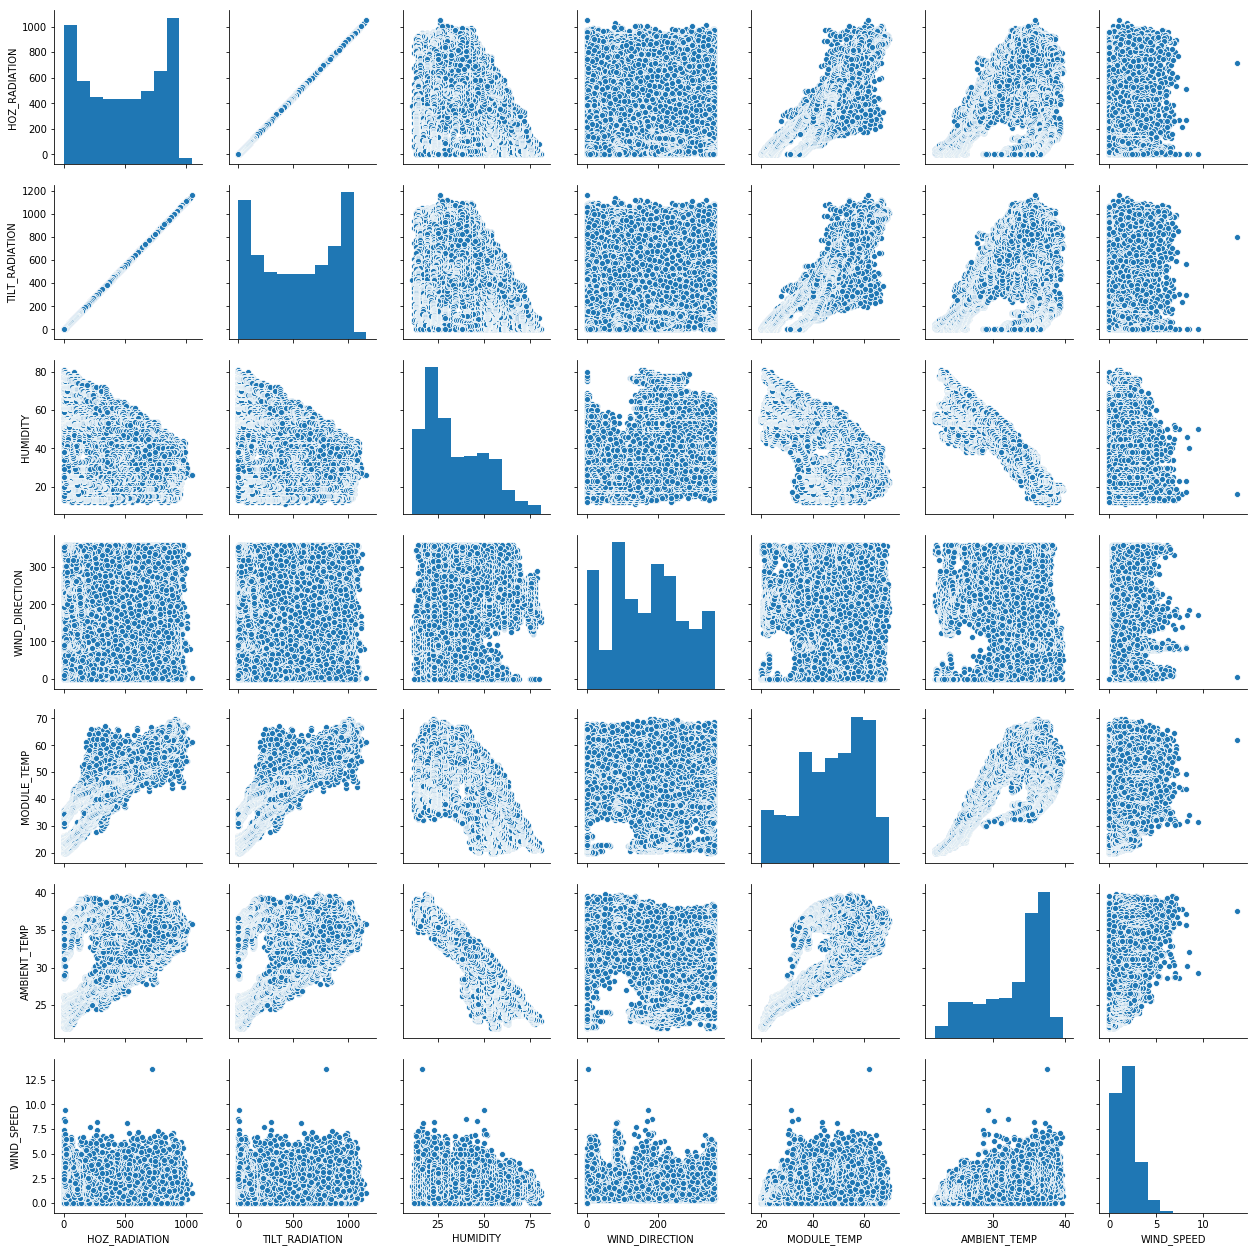

In [25]:
x = data.n[['HOZ_RADIATION' ,'TILT_RADIATION', 'HUMIDITY', 'WIND_DIRECTION', 'MODULE_TEMP','AMBIENT_TEMP','WIND_SPEED']]
sb.pairplot(x)

In [26]:
x = data.n[['HOZ_RADIATION' ,'TILT_RADIATION', 'HUMIDITY', 'WIND_DIRECTION', 'MODULE_TEMP','AMBIENT_TEMP','WIND_SPEED']]
x.corr()

,HOZ_RADIATION,TILT_RADIATION,HUMIDITY,WIND_DIRECTION,MODULE_TEMP,AMBIENT_TEMP,WIND_SPEED
HOZ_RADIATION,1.000000,1.000000,-0.266652,0.058808,0.910304,0.385960,0.158130
TILT_RADIATION,1.000000,1.000000,-0.266650,0.058808,0.910303,0.385958,0.158130
HUMIDITY,-0.266652,-0.266650,1.000000,0.415121,-0.516352,-0.926349,-0.159909
WIND_DIRECTION,0.058808,0.058808,0.415121,1.000000,-0.034817,-0.359221,0.034815
MODULE_TEMP,0.910304,0.910303,-0.516352,-0.034817,1.000000,0.649347,0.176967
AMBIENT_TEMP,0.385960,0.385958,-0.926349,-0.359221,0.649347,1.000000,0.250862
WIND_SPEED,0.158130,0.158130,-0.159909,0.034815,0.176967,0.250862,1.000000


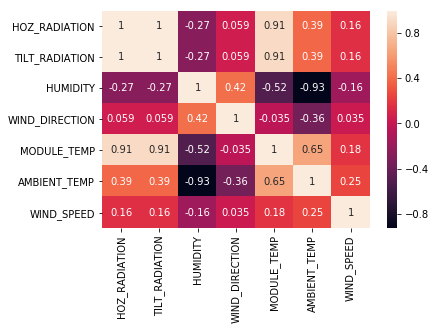

In [27]:
import seaborn as sns

cols = ['HOZ_RADIATION' ,'TILT_RADIATION', 'HUMIDITY', 'WIND_DIRECTION', 'MODULE_TEMP','AMBIENT_TEMP','WIND_SPEED']
hm = sns.heatmap(data.n[cols].corr(),
                 cbar=True,
                 annot=True)

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error

In [29]:
lr = lm.LinearRegression()

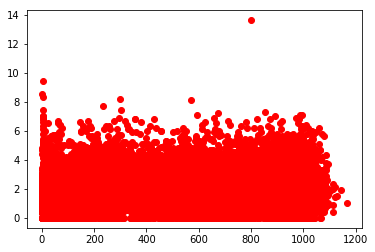

In [30]:
x = data.n.iloc[:, 1]
y = data.n.iloc[:, 6]
plt.scatter(x,y,color = 'red')

('R-squared for degree 1 = ', 0.025005048497418247)
('R-squared for degree 2 = ', 0.03361950342328801)
('R-squared for degree 3 = ', 0.03711896576392004)
('R-squared for degree 4 = ', 0.03748387956457688)
('R-squared for degree 5 = ', 0.037530417039965625)
('R-squared for degree 6 = ', 0.03758784201977383)
('R-squared for degree 7 = ', 0.037588656749004135)


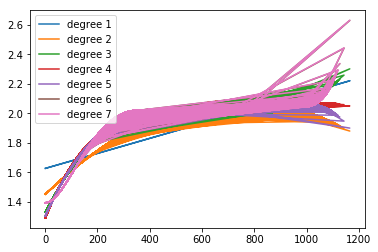

In [31]:
for deg in [1, 2, 3, 4, 5, 6, 7]:
    lr.fit(np.vander(x, deg + 1), y)
    y_lr = lr.predict(np.vander(x, deg + 1))
    plt.plot(x, y_lr, label='degree ' + str(deg))
    plt.legend(loc=2)
    print ("R-squared for degree " + str(deg) + " = ", r2_score(y, y_lr))
plt.show()

In [32]:
import pandas as pd
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import *
from matplotlib import pyplot as plt
from matplotlib import rc
import numpy as np
from sklearn.cluster import KMeans

%matplotlib inline

In [33]:
from sklearn import preprocessing
dataNorm = preprocessing.scale(data.n)

In [34]:
data_dist = pdist(dataNorm, 'euclidean')
data_linkage = linkage(data_dist, method='average')

In [35]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

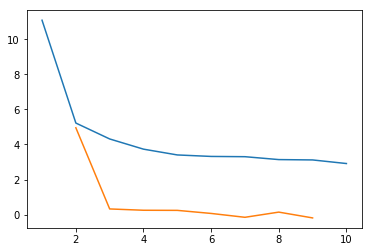

('clusters:', 2)


In [36]:
last = data_linkage[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2 
print("clusters:", k)

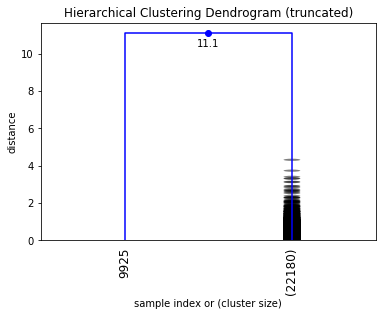

In [37]:
nCluster=2

fancy_dendrogram(
    data_linkage,
    truncate_mode='lastp',
    p=nCluster, 
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
)
plt.show()

In [38]:
km = KMeans(n_clusters=3).fit(dataNorm)

In [39]:
k=3
clusters=fcluster(data_linkage, k, criterion='maxclust')
clusters

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [40]:
km.labels_ +1

array([3, 3, 3, ..., 2, 2, 3], dtype=int32)

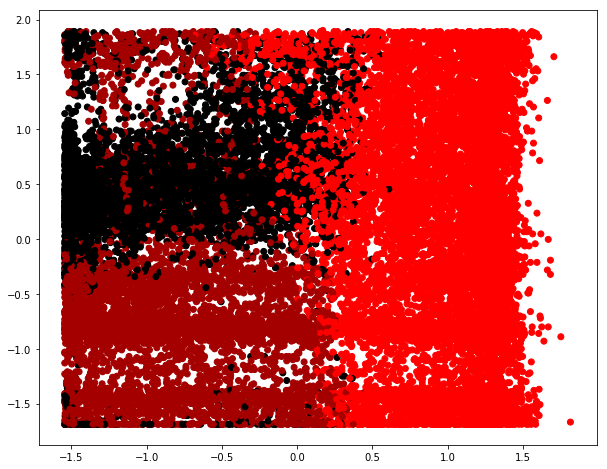

In [41]:
plt.figure(figsize=(10, 8))
plt.scatter(dataNorm[:,1], dataNorm[:,3], c=km.labels_, cmap='flag')
plt.show()

In [42]:
dataK=data
dataK['group_no']=clusters
writer = pd.ExcelWriter('KMeans.xlsx')
dataK.to_excel(writer,'KMeans')
writer.save()